In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_diabetes

# Load dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = (diabetes_data.target > diabetes_data.target.mean()).astype(int)  # Convert target to binary

# Preview data
print(X.head())
print(y[:5])


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
[0 0 0 1 0]


In [3]:
#Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Make predictions
y_pred = model.predict(X_test)


In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 73.03%


In [7]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        50
           1       0.71      0.64      0.68        39

    accuracy                           0.73        89
   macro avg       0.73      0.72      0.72        89
weighted avg       0.73      0.73      0.73        89



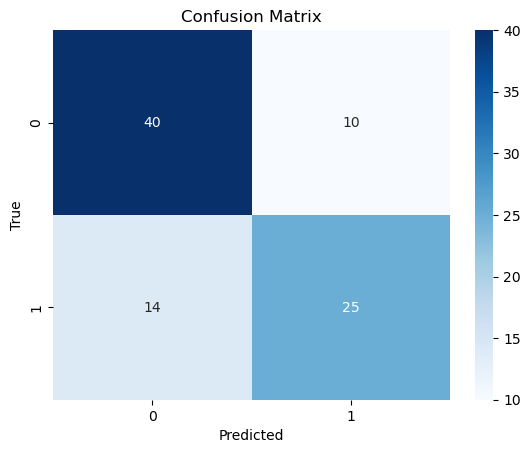

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_2816\1069714285.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")


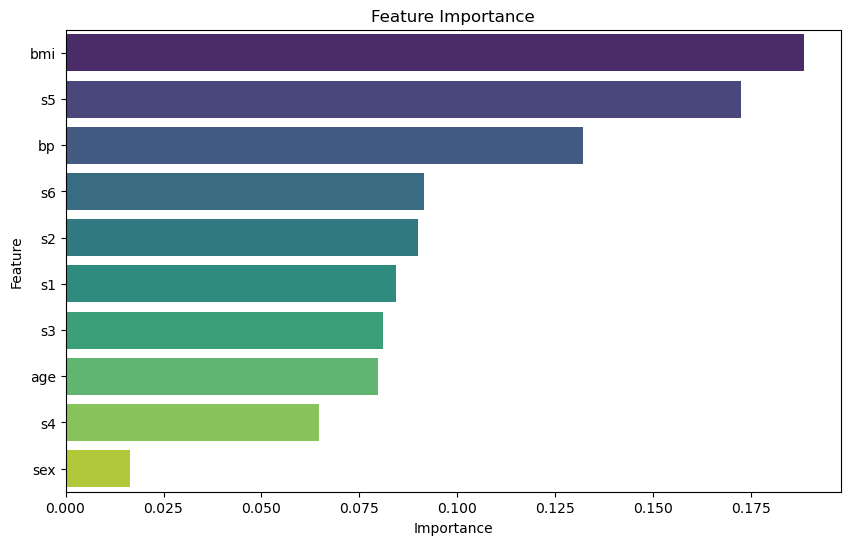

In [9]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [10]:
# Example input (random values)
example_data = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(example_data)
print(f"Prediction: {'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'}")


Prediction: Non-Diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\vinay\AppData\Local\Temp\ipykernel_2816\3193139960.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


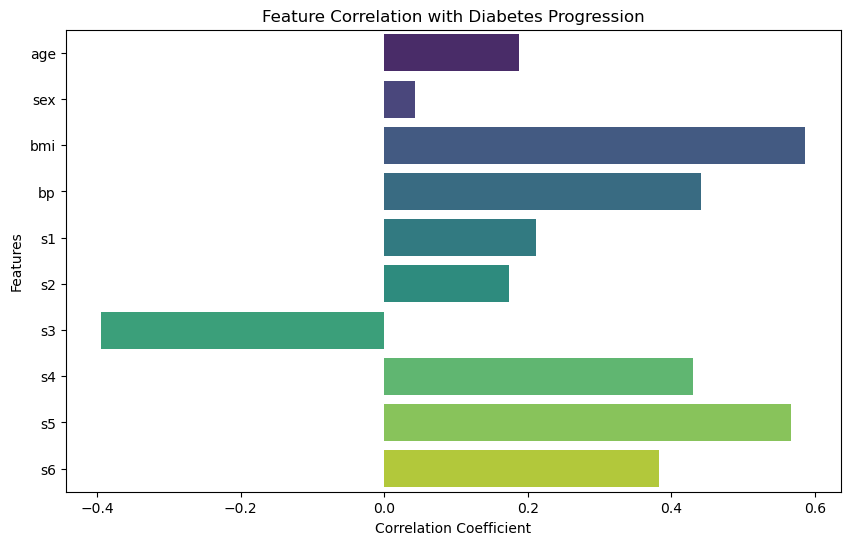

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr = X.corrwith(pd.Series(y))
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Feature Correlation with Diabetes Progression")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()
